# **Terza Esercitazione**
# Infiltrazione dell'acqua in una colonna di suolo

L'obiettivo della terza parte dell'esercitazione è quello di studiare l'infiltrazione dell'acqua all'interno di una colonna a più strati di suolo attraverso l'equazione di Richards (1D).  Quest'ultima rappresenta l'equazione di conservazione della massa all'interno del suolo e tiene conto di un termine gravitativo, uno avvettivo ed uno diffusivo:

\begin{equation}
\frac{\delta\theta}{\delta t} + \frac{\delta}{\delta z}(K(\theta_{w}\cdot\frac{\delta(\phi + z)}{\delta z})
\end{equation}

In caso, infatti, di disequilibrio nel carico idraulico, si deve venire a formare un movimento dell'acqua perchè venga compensato. Inoltre, tale equazione è in generale valida per i suoli insaturi, può però essere anche estesa a quelli saturi.


La trattazione in questo caso sarà discreta per semplificare il problema: vengono quindi considerati i valori in alcuni punti nel dominio e dev'essere a questo fine introdotta una griglia. Per avere risultati più precisi sarà poi necessario infittire i punti che formano la griglia: per avere maggiorni informazioni nei punti che più ci interessano senza appesantire troppo il programma, è stata costruita più fitta in vicinanza della superficie rispetto ai punti più in profondità.

Per eseguire il programma, è quindi neceessario: assegnare un dominio di calcolo, la griglia di calcolo e un dominio iniziale.

Vengono importati i file .csv relativi alla griglia, alle condizioni iniziali e al modello utilizzato per la risoluzione (che in questo caso consiste nella parametrizzazione di Van Genuchten).

## Prima simulazione: 
Nella prima parte dell'esercitazione è stato preso in considerazione un suolo formato da due strati:
- Sabbia fino ad una profondità di $0.3$ [$m$]
- Argilla Limosa fino ad una profondità di $2$ [$m$]

Per quello che riguarda invece la condizione iniziale si parte assegnando una condizione idrostatica (di equlibrio), in modo che l'evoluzione nel tempo dipenda solo dalle condizioni al contorno. Poniamo quindi alla profondità $-2$ [$m$] la suzione pari a $0$ [$m$] (quindi la transizione tra suolo saturo e insaturo) mentre in superficie ci sarà una suzione di $-2$ [$m$].

Si procede, quindi, andando a creare la griglia a partive dai file .csv descritti.

In [1]:
import os
import pandas as pd #leggere file csv

from geoframepy.whetgeo1d import grid_creator 
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
project_path = os.path.dirname(os.getcwd())

# aggiungere legenda nel grafico di prima per i colori

In [2]:
grid_input_file_name = project_path + "/data/Grid_input/ex02_grid.csv"
ic_input_file_name = project_path + "/data/Grid_input/ex02_ic.csv" 
parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv" #parametri per alcuni set di suolo
dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"
grid_type = 'classical'
dz_min = 0.005
dz_max = 0.1
b = 0.1
psi_interp_model = "linear"
T_interp_model = "linear"

In [3]:
output_file_name =  project_path + "/data/Grid_NetCDF/Ric2.nc"
output_title = '''Griglia per la risoluzione dell'equazione di Richards.
                  '''
output_date = ''

output_summary = ''' 

Type,eta,K,equationStateID,parameterID
L,0,50,0,1
L,-1.5,30,0,10
L,-2,0,nan,nan


eta,Psi0,T0
-0.0,-2.0,273.15
-2.0,0.0,273.15

'''


output_institution = 'GEOframe'

In [4]:
data_grid = pd.read_csv(grid_input_file_name)
print('Grid')
print(data_grid)
print()

data_ic = pd.read_csv(ic_input_file_name)
print('IC')
print(data_ic)
print()

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
print('Parameter')
print(data_parameter)
print()

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                   theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                   output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)

Grid
  Type  eta   K  equationStateID  parameterID
0    L  0.0  50              0.0          1.0
1    L -0.3  50              0.0         10.0
2    L -2.0   0              NaN          NaN

IC
   eta  Psi0      T0
0 -0.0  -2.0  273.15
1 -2.0   0.0  273.15

Parameter
    thetaS  thetaR     n  alpha  alphaSpecificStorage  betaSpecificStorage  \
0     0.43   0.045  2.68   14.5          1.000000e-08         4.400000e-10   
1     0.41   0.057  2.28   12.4          1.000000e-08         4.400000e-10   
2     0.41   0.065  1.89    7.5          1.000000e-08         4.400000e-10   
3     0.45   0.067  1.41    2.0          1.000000e-08         4.400000e-10   
4     0.43   0.078  1.56    3.6          1.000000e-08         4.400000e-10   
5     0.39   0.100  1.48    5.9          1.000000e-08         4.400000e-10   
6     0.43   0.089  1.23    1.4          1.000000e-08         4.400000e-10   
7     0.41   0.095  1.31    1.9          1.000000e-08         4.400000e-10   
8     0.38   0.100  1.23    2.7

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
%matplotlib inline

import math
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid') #vari stili per non avere lo stile bianco

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True, #se vogliamo cornice, etc
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": False,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

plt.rcParams.update(nice_fonts)

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
project_path = os.path.dirname(os.getcwd())

Vengono quindi definite altre funzioni, specificando le condizioni al contorno, che in questo caso, sono quella di Dirichlet per la superficie superiore mentre, per quella inferiore, si assume suzione nulla.

In [6]:
os.chdir(project_path+'/output')
os.listdir()


['emma_0000.nc',
 'ex00_0000.nc',
 'ex00_canc_0000.nc',
 'ex00_Idrologia2305_0000.nc',
 'ex01_0000.nc',
 'ex02_0000.nc',
 'ex02_new_0000.nc',
 'ex03_dry_0000.nc',
 'ex03_wet_0000.nc',
 'ex04_0000.nc',
 'ex04_deep_0000.nc',
 'ex05_15C_0000.nc',
 'ex05_30C_0000.nc',
 'ex05_5C_0000.nc',
 'ex06_0000.nc',
 'ex06_calibrated_0000.nc',
 'ex06_simulated_psi.csv',
 'ex06_simulated_theta.csv',
 'ex07_0000.nc',
 'ex07_simulated_psi.csv',
 'ex07_simulated_theta.csv',
 'ex08_0000.nc',
 'Integrate PDE',
 'Ric2_0000.nc',
 'Ric2_Pioggia_0000.nc',
 'Ric3_0000.nc',
 'Ric4_0000.nc',
 'richardsCalib']

In [7]:
ds = xr.open_dataset("Ric2_0000.nc")
ds

<xarray.Dataset>
Dimensions:           (depth: 100, dualDepth: 100, time: 1441)
Coordinates:
  * depth             (depth) float64 -1.983 -1.949 -1.915 ... -0.009 -0.003
  * dualDepth         (dualDepth) float64 -2.0 -1.966 -1.932 ... -0.012 -0.006
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-01-02
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex00.
    Top_boundary_condition:             Top Dirichlet
    Bottom_boundary_condition:          Bottom free drainage
    path_top_boundary_condition:        C:\Users\titab\Desktop\OMS_Project_WH...
    path_bottom_boundary_condition:     C:\Users\titab\Desktop\OMS_Project_WH...
    path_grid:                          C:\Users\titab\Desktop\OMS_Project_WH...
    time_delta:                          
    swrc_model:                         {Van Genuchten}
    soil_hydraulic_conductivity_model:  {Mualem Van Genuchten}
    interface_conductivity_model:       max

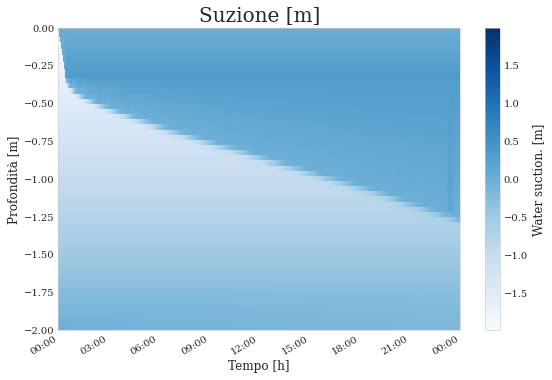

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.plot(ax=ax, y='depth', cmap='Blues') 

ax.set_title('Suzione [m]', fontsize=20)
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Tempo [h]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#ax.xaxis.set_tick_params(rotation=45)

plt.show()

L'andamento del grafico rappresenta quanto ci si aspetterebbe in presenza di una lama d'acqua al di sopra del suolo: il comportamento è decisamente più drenante nella sabbia, ma in generale anche nell'argilla si nota come la lama d'acqua si muova poi verso il basso.

Viene riportata poi l'immagine estratta da una simulazione svolta con una griglia con un numero minore di punti nello strato di argilla limosa: è evidente come in quel caso la qualità del grafico fosse molto più bassa e per questo si è deciso di aumentare il numero di punti che discretizzavano lo strato, impostando $K = 50$
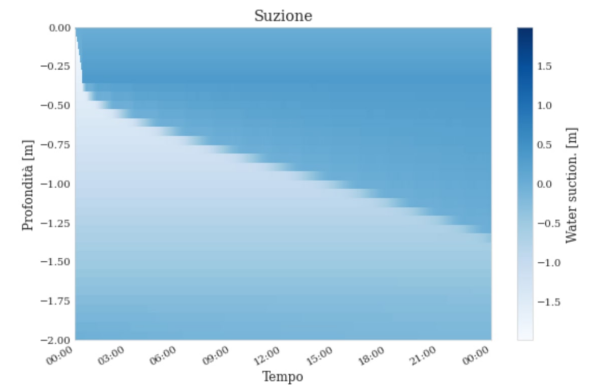

In [11]:
ds.time.values

array(['2020-01-01T00:00:00.000000000', '2020-01-01T00:01:00.000000000',
       '2020-01-01T00:02:00.000000000', ...,
       '2020-01-01T23:58:00.000000000', '2020-01-01T23:59:00.000000000',
       '2020-01-02T00:00:00.000000000'], dtype='datetime64[ns]')

Questo grafico mostra il valore della suzione in funzione della profondità del suolo in tre momenti diversi: sono stati scelti come valori uno a inizio della simulazione, uno poco successivo e infine a distanza di 21h.

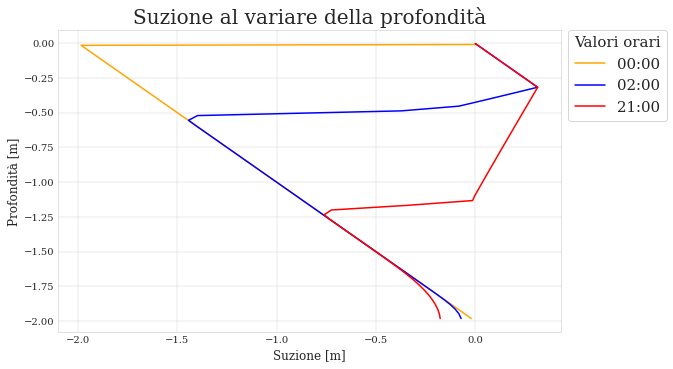

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.sel(time= '2020.01.01 00:00').plot(ax=ax, y='depth', color='orange') #boh, si potrebbe prendere in considerazione anche più valori contemporaneamente sia dal punto di vista della durata sia della profondità ma non so bene come
ds.psi.sel(time='2020-01-01 02:00').plot(ax=ax, y='depth', color='blue') #anche in questo caso prendiamo il dataset, la variabile che vogliamo settare e il timestep che vogliamo selezionare
#dopo aver selezionato il timestep facciamo un plot specificando la coordinata sull'asse y e il colore della linea
ds.psi.sel(time='2020-01-01 21:00').plot(ax=ax, y='depth', color='red')
ax.set_title('Suzione al variare della profondità', fontsize=20)
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Suzione [m]')
plt.legend(['00:00', '02:00', '21:00'], loc='center left',  title = "Valori orari", title_fontsize = 15, fontsize=15, bbox_to_anchor=(1, 0.85))

plt.show()

 E' evidente come lentamente l'andamento della suzione si distanzi dalla condizione iniziale idrostatica, in quanto l'evoluzione nel tempo dipende solo dalle condizioni al contorno.

Il seguente grafico consiste invece nella valutazione dell'andamento della suzione nel tempo, considerando valori di profondità costanti:

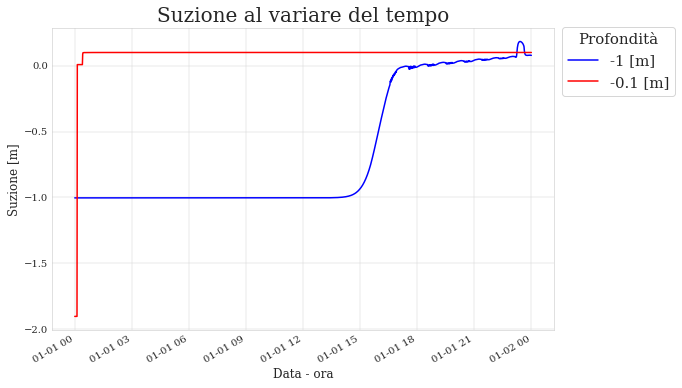

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(9,9/1.618))

ds.psi.sel(depth=-1, method='nearest').plot(ax=ax, color='blue')
ds.psi.sel(depth=-0.1, method='nearest').plot(ax=ax, color='red') #coordinata più vicina alla superficie
ax.set_ylabel('Suzione [m]')
ax.set_xlabel('Data - ora')
#ax.set_xlabel('text')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_tick_params(rotation=45)

plt.legend(['-1 [m]', '-0.1 [m]'], loc='center left',  title = "Profondità", title_fontsize = 15, fontsize=15, bbox_to_anchor=(1, 0.89))
ax.set_title("Suzione al variare del tempo", fontsize=20)
plt.show()

#funzione inizia ad aumentare solo verso la fine

# Precipitazione su suolo Multi-Strato

Si ripete poi la trattazione cambiando la condizione al contorno. Invece di una lama d'acqua in superficie si prende in considerazione una precipitazione impattante suol suolo: in questo caso le condizioni sulla superficie sono di Neumann e non di Dirichlet.

Quello che andiamo a specificare è l'intensità della pioggia. 

In [80]:
ds = xr.open_dataset("Ric2_Pioggia_0000.nc")
ds
from geoframepy.timeseries import io_csv

In [81]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/ex02_rainfall_5min.csv',datetime_index=False)
rain.head()

,Datetime,0
0,2020-02-29 10:00:00,0.0
1,2020-02-29 10:05:00,0.0
2,2020-02-29 10:10:00,0.0
3,2020-02-29 10:15:00,0.0
4,2020-02-29 10:20:00,0.0


In [82]:
rain['0']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
572    0.0
573    0.0
574    0.0
575    0.0
576    0.0
Name: 0, Length: 577, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (1441,) and (577,)

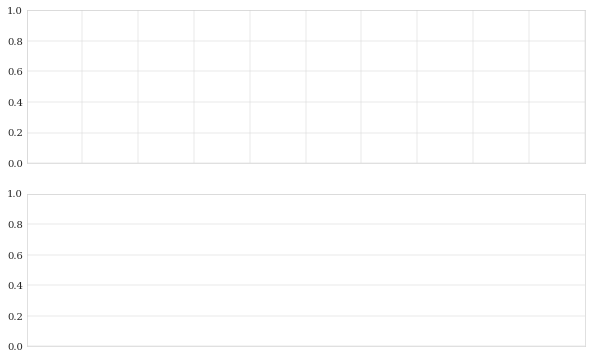

In [83]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

ax[0].plot(ds.time.values, rain['0'])
ax[0].set_ylabel('Rain [mm]')


a = ds.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)#, cbar_kwargs={'label': '$\psi$ [m]'})

#ax[1].set_ylabel('Depth [m]')
#ax[1].set_xlabel('Time [dd hh:mm]')


#ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
a#x[1].xaxis.set_tick_params(rotation=45)

cbar_ax = fig.add_axes([0.99, 0.19, 0.02, 0.36])
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.tight_layout()
plt.show()

#mentre prima avevamo un valore di suzione costante nel tempo, in questo caso abbiamo un primo impulso e poi un altro più breve
#vediamo che nella parte della sezione non cambia niente, poi inizia a piovere = suolo inizia a saturare. blu più intenso = picco della saturazione
#blu diventa molto più chiaro ma poi col secondo picco vediamo che c'è un nuovo aumento della suzione

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.02,  method='nearest').plot(ax=ax1, color='red')
ds.psi.sel(depth=-0.04,  method='nearest').plot(ax=ax1, color='green')
ds.psi.sel(depth=-0.06,  method='nearest').plot(ax=ax1, color='blue')
ds.psi.sel(depth=-0.08,  method='nearest').plot(ax=ax1, color='yellow')
ds.psi.sel(depth=-0.1,   method='nearest').plot(ax=ax1, color='purple')


ax1.set_title('Water pressure \nat different depths')


ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Time [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color='red')
ds.theta.sel(depth=-0.2, method='nearest').plot(ax=ax2, label = '-0.2 m', color='green')
ds.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color='blue')
ds.theta.sel(depth=-1.0, method='nearest').plot(ax=ax2, label = '-1.0 m', color='yellow')
ds.theta.sel(depth=-1.5, method='nearest').plot(ax=ax2, label = '-1.5 m', color='purple')

ax2.set_title('Water content \nat different depths')


ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Time [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

#andamento suzione e contenuto d'acqua a diverse profondità
#vicino alla superficie abbiamo risposta della suzione praticamente istantanea = man mano che andiamo verso il basso la risposta non solo è spostata in avanti nel tempo
# oltre a questo ritardo vediamo che il picco è meno pronunciato, il segnale si attenuta
# per 10 cm il segnale si vede ancora, già più sotto il segnale è molto leggero = il segnale della suzione viene mediato con le curve di ritenzione idrica

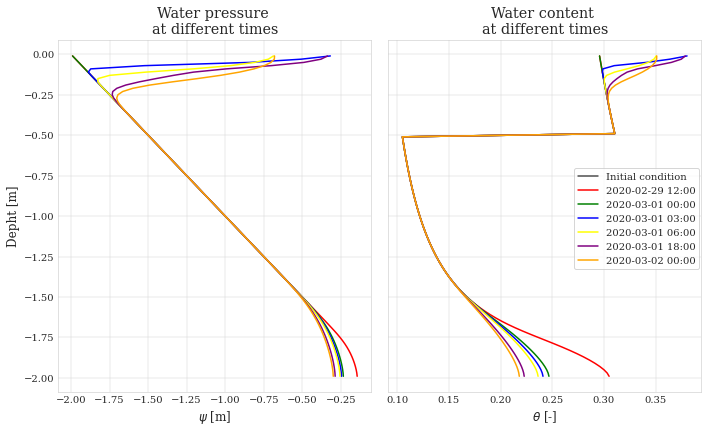

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

# ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')
ds.psi.sel(time='2020-02-29 12:00').plot(ax=ax1, y='depth', label='2020-02-29 12:00', color='red')
ds.psi.sel(time='2020-03-01 00:00').plot(ax=ax1, y='depth', label='2020-03-01 00:00', color='green')
ds.psi.sel(time='2020-03-01 03:00').plot(ax=ax1, y='depth', label='2020-03-01 03:00', color='blue')
ds.psi.sel(time='2020-03-01 06:00').plot(ax=ax1, y='depth', label='2020-03-01 06:00', color='yellow')
ds.psi.sel(time='2020-03-01 18:00').plot(ax=ax1, y='depth', label='2020-03-01 18:00', color='purple')
ds.psi.sel(time='2020-03-02 00:00').plot(ax=ax1, y='depth', label='2020-03-02 00:00', color='orange')

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

plt.plot(np.nan, np.nan, label='Initial condition', color='0.3')
ds.theta.sel(time='2020-02-29 12:00').plot(ax=ax2, y='depth', label='2020-02-29 12:00', color='red')
ds.theta.sel(time='2020-03-01 00:00').plot(ax=ax2, y='depth', label='2020-03-01 00:00', color='green')
ds.theta.sel(time='2020-03-01 03:00').plot(ax=ax2, y='depth', label='2020-03-01 03:00', color='blue')
ds.theta.sel(time='2020-03-01 06:00').plot(ax=ax2, y='depth', label='2020-03-01 06:00', color='yellow')
ds.theta.sel(time='2020-03-01 18:00').plot(ax=ax2, y='depth', label='2020-03-01 18:00', color='purple')
ds.theta.sel(time='2020-03-02 00:00').plot(ax=ax2, y='depth', label='2020-03-02 00:00', color='orange')

ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

#profili=
#contenuto d'acqua, c'è una certa discontinuità

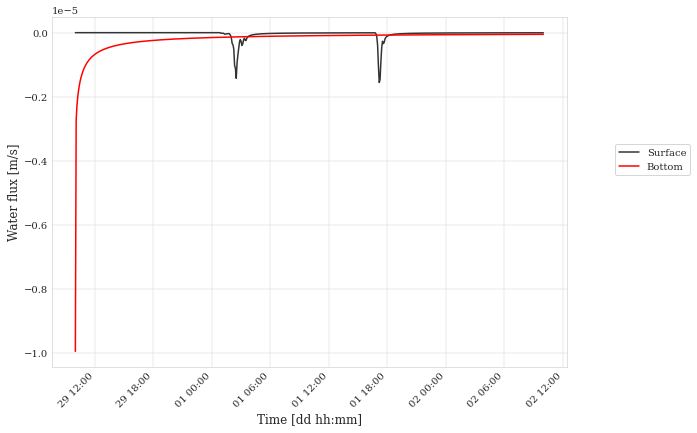

In [27]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

#flussi sia alla superficie sia al fondo = abbiamo free drenage, è diverso da 0 fin da subito. nel primo istante è pari a Ks, poi il suolo desatura e la suzione decresce
# la coordinata è positiva verso l'alto = valori negativi vuol dire che l'acqua si sta muovendo verso il basso
# quando abbiamo la simulazione con Dirichlet abbiamo fin da subito un flusso verso il basso

#abbiamo due impulsi in corrispondenza degli elementi di pioggia
#al fondo abbiamo una condizione di deflusso libero = trascuriamo il gradiente di psi, inizialmente il gradiente di z è 1 quindi rimane solo k

#quando c'è un gradiente di suzione bisogna considerare che l'acqua può muoversi anche verso l'alto.
#se abbiamo un suolo completamente asciutto e suzione al fondo. quello che succede è che facendo durare la simulazione per tempi abbastanza lunghi è la risalita capillare
# altra cosa che abbiamo visto nell'esempio di prima = flusso di darcy alla superficie è più piccolo di quello di prima. al fondo è maggiore perchè ks è più grande
#il flusso alla superficie è maggiore rispetto a quello al fondo

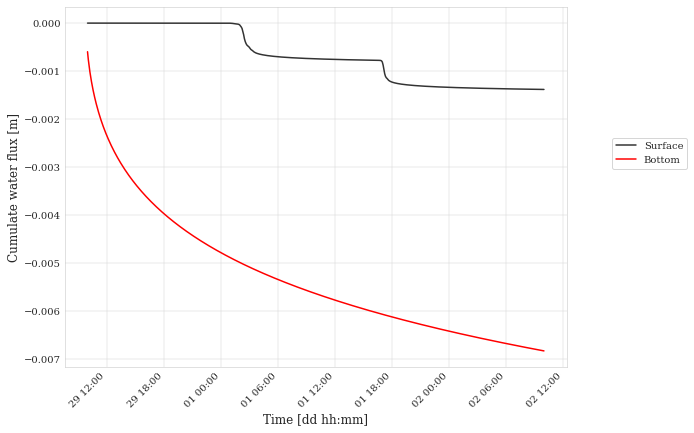

In [28]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

#cumulate dei volumi di acqua che entrano ed escono dal dominio
#cumulata del volume d'acqua attribuibile al volume di pioggia

- se vogliamo caso con la pioggia dobbiamo cambiare solo la condizione al contorno = top neumann e non dirichlet.
l'unico modo per specificare nel codice che i valori sono di flusso e non di suzione è di cambiare con top neumann da top dirichlet
se prima abebamo suzione costante nel tempo, questa vola abbiamo due picchi di pioggia = quando inizia a piovere il suolo inizia a saturare = picco in corrispondenza del picco di precipitazione
risposta della suzione quasi istantanea = se siamo in profondità la curva inizia a salire un po' dopo e il picco è un po' meno pronunciato

- Produzione di runoff superficiale dovuto a eccesso rispetto a quello che c'è nel suolo. 
fin tanto che l'intensità di pioggia è maggiore della capacità di infiltrazione, parte di acqua si accumula in superficie. quello che succede in questo caso è che la condizione al contorno non è una semplice condizione tipo neumann. bisogna tener conto del volume che si accumula in superficie avendo in input la pioggia. questo è più semplice di cambiare la condizione al contorno al cambiare della presenza o meno di acuqa in superficie. water ponding dopo un po' decresce in questo caos

#griglia classica = vc per ogni layer

- produzione di runoff perchè il suolo continua a saturarsi = in questo caso abbiamo come condizioni a contorno la precipitazione.

sabbia
argilla limosa